<a href="https://colab.research.google.com/github/anuj-m-sharma/Football_Analysis_using_Facebook_Prophet/blob/main/Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys

! conda install  -c conda-forge fbprophet

/bin/bash: conda: command not found


In [ ]:
import pandas as pd

In [ ]:
!conda install -c conda-forge fbprophet -y


/bin/bash: conda: command not found


In [ ]:

import fbprophet



In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
prop_data=pd.read_csv('Prophet_data.csv')

In [ ]:
prop_data.head()

,Date,Month,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,Good/No Good,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018-09,september,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,1,27091,NaN,NaN,PHI,3,05:03:00,NaN,NaN,NaN,0,0,NaN,21,NaN,0,13
1,2018-09,september,1368,"(6:12) J.Elliott 26 yard field goal is GOOD, C...",2,4,8,PHI,Field Goal,Kick Attempt Good,1,44966,NaN,NaN,ATL,8,06:12:00,NaN,NaN,NaN,0,3,NaN,26,NaN,0,18
2,2018-09,september,1587,"(2:13) M.Bryant 52 yard field goal is GOOD, Ce...",2,4,17,ATL,Field Goal,Kick Attempt Good,1,27091,NaN,NaN,PHI,34,02:13:00,NaN,NaN,NaN,3,3,NaN,52,NaN,0,76
3,2018-09,september,1226,(13:18) (Field Goal formation) J.Tucker 41 yar...,2,4,13,BAL,Field Goal,Kick Attempt Good,1,39470,NaN,NaN,BUF,23,13:18:00,NaN,NaN,NaN,14,0,NaN,41,NaN,0,33
4,2018-09,september,1613,(8:48) (Field Goal formation) S.Hauschka 52 ya...,2,4,9,BUF,Field Goal,Kick Attempt No Good,0,33469,NaN,NaN,BAL,34,08:48:00,NaN,NaN,NaN,17,0,NaN,52,NaN,-8,76


In [ ]:
prop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    890 non-null    object 
 1   Month                   890 non-null    object 
 2   playId                  890 non-null    int64  
 3   playDescription         890 non-null    object 
 4   quarter                 890 non-null    int64  
 5   down                    890 non-null    int64  
 6   yardsToGo               890 non-null    int64  
 7   possessionTeam          890 non-null    object 
 8   specialTeamsPlayType    890 non-null    object 
 9   specialTeamsResult      890 non-null    object 
 10  Good/No Good            890 non-null    int64  
 11  kickerId                890 non-null    int64  
 12  returnerId              1 non-null      float64
 13  kickBlockerId           0 non-null      float64
 14  yardlineSide            890 non-null    ob

In [ ]:
df_prop = [prop_data['Date'], prop_data['Good/No Good']]
headers = ["date", "Good"]
df = pd.concat(df_prop, axis=1, keys=headers)

In [ ]:
df.head()

,date,Good
0,2018-09,1
1,2018-09,1
2,2018-09,1
3,2018-09,1
4,2018-09,0


In [ ]:
df.columns = ['ds','y']
df.head()

,ds,y
0,2018-09,1
1,2018-09,1
2,2018-09,1
3,2018-09,1
4,2018-09,0


In [ ]:
df['ds'] = pd.to_datetime(df['ds'])

In [ ]:
df.head()

,ds,y
0,2018-09-01,1
1,2018-09-01,1
2,2018-09-01,1
3,2018-09-01,1
4,2018-09-01,0


In [ ]:
from fbprophet import Prophet

In [ ]:
model=Prophet()

In [ ]:
df.columns

Index(['ds', 'y'], dtype='object')

In [ ]:
df.dropna(axis=0,inplace=True)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [ ]:
df.head()

,ds,y
0,2018-09-01,1
1,2018-09-01,1
2,2018-09-01,1
3,2018-09-01,1
4,2018-09-01,0


In [ ]:
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model.component_modes


{'additive': ['additive_terms', 'extra_regressors_additive', 'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
df.tail()

,ds,y
885,2018-12-01,1
886,2018-12-01,1
887,2018-12-01,1
888,2018-12-01,1
889,2018-12-01,1


In [ ]:
future=model.make_future_dataframe(periods=365)


In [ ]:
future.tail()

,ds
364,2019-11-27
365,2019-11-28
366,2019-11-29
367,2019-11-30
368,2019-12-01


In [ ]:
pred_data=model.predict(future)

In [ ]:
pred_data.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-09-01,0.858140,0.428923,1.308413,0.858140,0.858140,0.0,0.0,0.0,0.0,0.0,0.0,0.858140
1,2018-10-01,0.859577,0.403801,1.286289,0.859577,0.859577,0.0,0.0,0.0,0.0,0.0,0.0,0.859577
2,2018-11-01,0.861061,0.423437,1.278945,0.861061,0.861061,0.0,0.0,0.0,0.0,0.0,0.0,0.861061
3,2018-12-01,0.862498,0.407991,1.317469,0.862498,0.862498,0.0,0.0,0.0,0.0,0.0,0.0,0.862498
4,2018-12-02,0.862546,0.448078,1.286492,0.862546,0.862546,0.0,0.0,0.0,0.0,0.0,0.0,0.862546


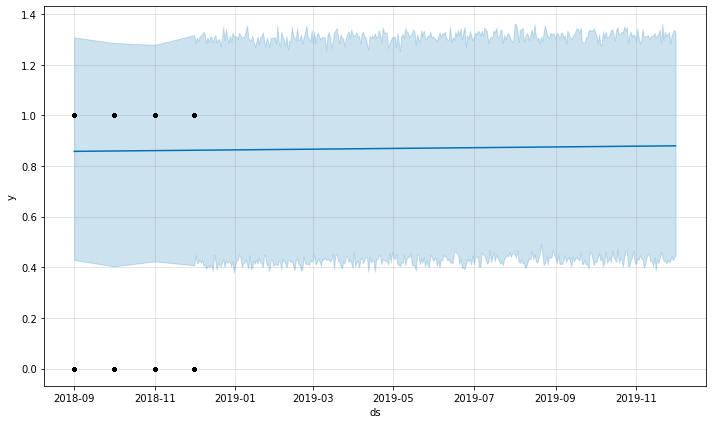

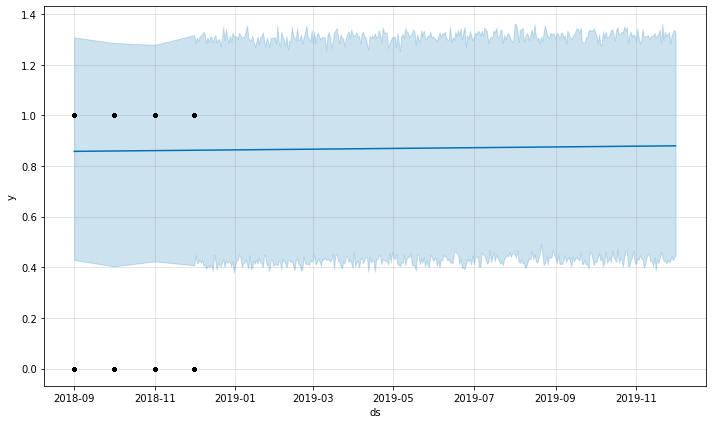

In [ ]:
model.plot(pred_data)

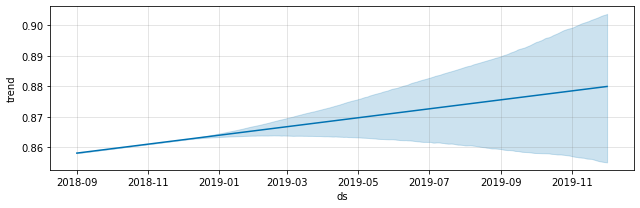

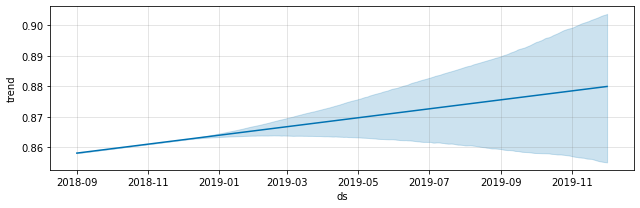

In [ ]:
model.plot_components(pred_data)

**Analysis**

For this assignment, we have used *'Facebook Prophet'* in order to predict whether NFL kickers will make or miss more kicks as the season progresses. We want to analyse this because the football season starts in August, and ends in February. Between August and January, the temperature drops a lot and inclement weather becomes more prevalent so we want to see if the weather is statistically more of a factor - especially with a lot of NFL teams playing in colder areas of the country up north and out west every week. We used Facebook prophet to predict whether kickers will be more likely to miss or make more kicks in January and February by using the data we have of all of the field goals made from August to December. From our models, we find that the ratio of made field goals to missed field goals only slightly increases throughout the season. From August to December, there seems to only be a .5% increase in the ratio of made field goals to missed field goals. Although we didn’t find any correlation between the change in seasons/change in weather and the ratio of made field goals to missed field goals, we still learned how to predict what the ratio will likely be for the future using data from what has already happened with Facebook Prophet. 